# Problem 1: Exploratory Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set()

## a) Print the statistical description of the predictor variables in the data and plot standard statistical distributions for each of the predictor variables. The predictors Variance, Skewness, Kurtosis, Entropy are all “numeric”. 

In [2]:
quizData = pd.read_csv('quizData.csv')
quizData.head()

,Variance,Skewness,Kurtosis,Entropy,Banknote
0,3.62160,8.6661,-2.8073,-0.44699,Genuine
1,4.54590,8.1674,-2.4586,-1.46210,Genuine
2,3.86600,-2.6383,1.9242,0.10645,Genuine
3,3.45660,9.5228,-4.0112,-3.59440,Genuine
4,0.32924,-4.4552,4.5718,-0.98880,Genuine


In [3]:
numData = pd.DataFrame(quizData[['Variance', 'Skewness', 'Kurtosis', 'Entropy']])
numData.head()

,Variance,Skewness,Kurtosis,Entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [4]:
print("Data type: ", type(numData))
print("Data dims: ", numData.shape)

print("Columns: ", len(numData.columns))

print("Data Types: ")
numData.dtypes

numData.info()
numData.describe()

Data type:  <class 'pandas.core.frame.DataFrame'>
Data dims:  (1000, 4)
Columns:  4
Data Types: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
Variance    1000 non-null float64
Skewness    1000 non-null float64
Kurtosis    1000 non-null float64
Entropy     1000 non-null float64
dtypes: float64(4)
memory usage: 31.4 KB


,Variance,Skewness,Kurtosis,Entropy
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.170628,1.724250,1.452808,-1.224837
std,2.820315,5.938027,4.462049,2.108555
min,-7.042100,-13.773100,-5.261300,-8.548200
25%,-1.941250,-1.916200,-1.674350,-2.532775
50%,0.119660,2.140700,0.561365,-0.620265
75%,2.460275,6.573575,3.444400,0.376710
max,6.563300,12.951600,17.927400,2.449500


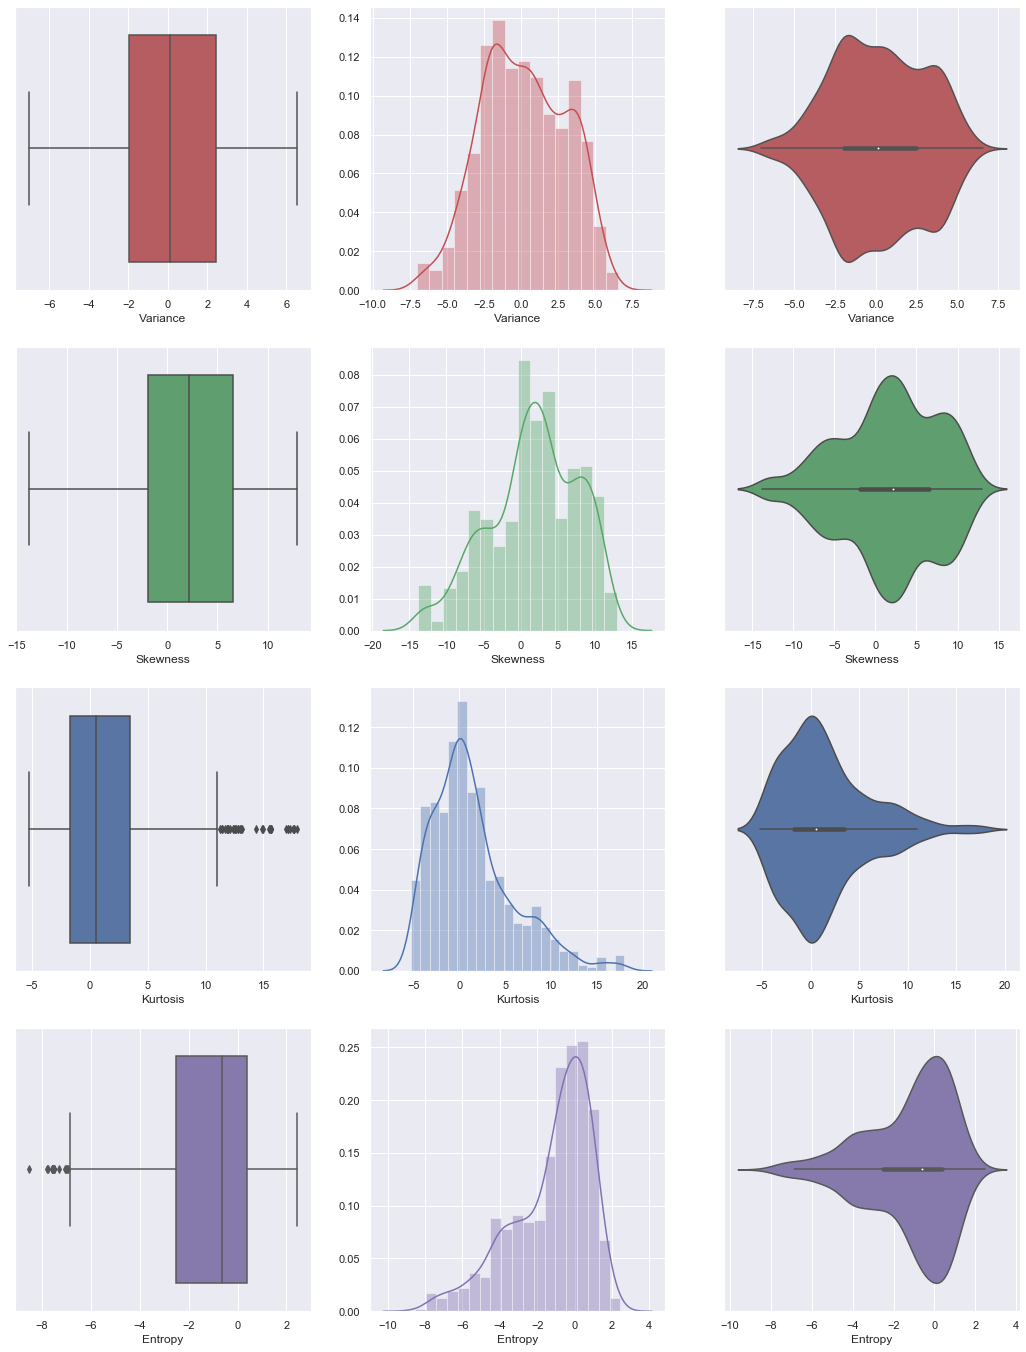

In [5]:
f, axes = plt.subplots(4, 3, figsize=(18, 24))
colors = ["r", "g", "b", "m"]

count = 0
for var in numData:
    sb.boxplot(numData[var], orient = "h", color = colors[count], ax = axes[count,0])
    sb.distplot(numData[var], color = colors[count], ax = axes[count,1])
    sb.violinplot(numData[var], color = colors[count], ax = axes[count,2])
    count += 1

In [6]:
numData.skew()

Variance   -0.034753
Skewness   -0.392122
Kurtosis    1.080393
Entropy    -0.969799
dtype: float64

          Variance  Skewness  Kurtosis   Entropy
Variance  1.000000  0.300142 -0.402273  0.243404
Skewness  0.300142  1.000000 -0.792862 -0.527526
Kurtosis -0.402273 -0.792862  1.000000  0.328047
Entropy   0.243404 -0.527526  0.328047  1.000000


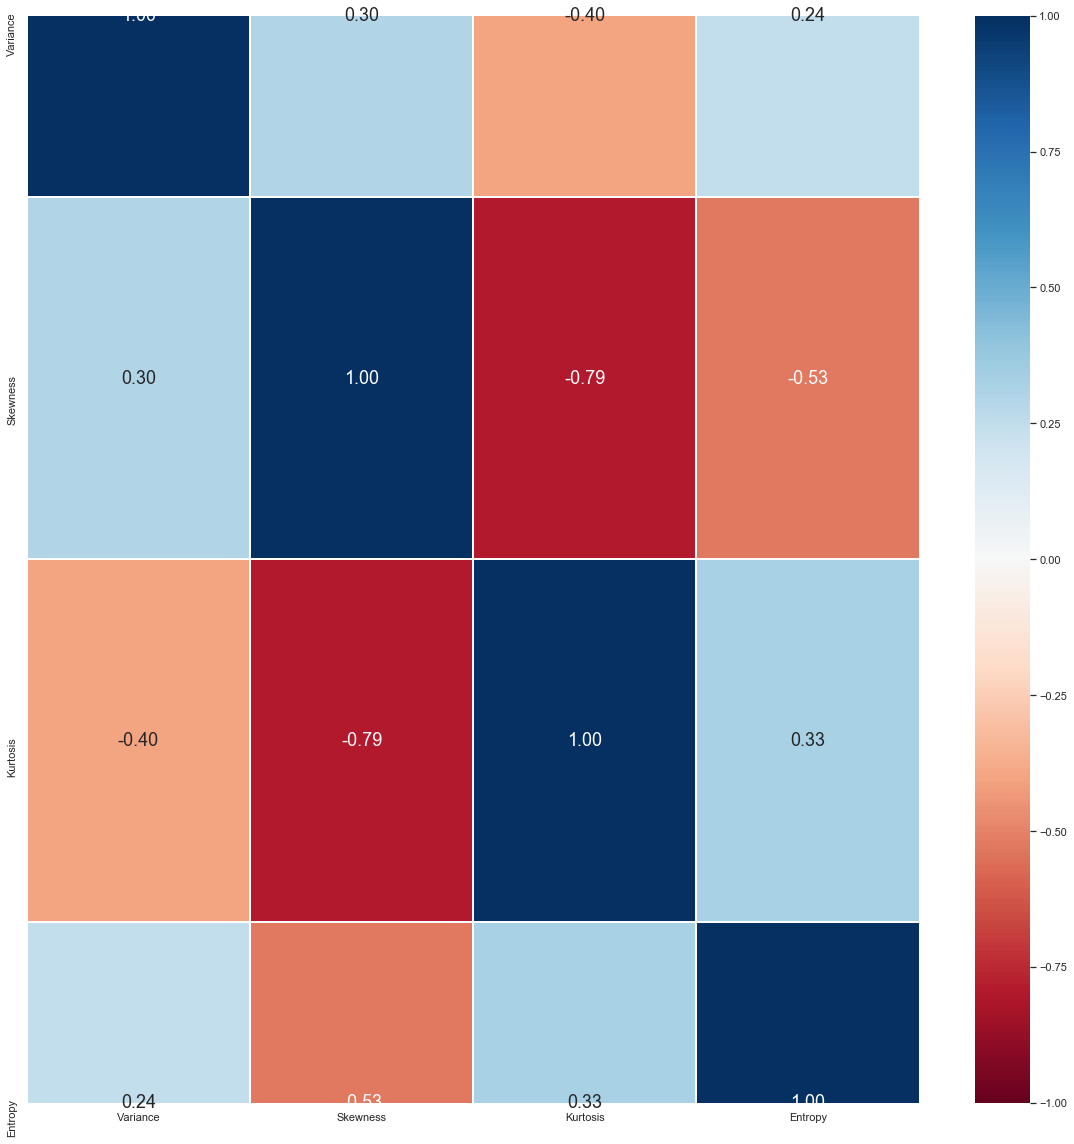

In [7]:
print(numData.corr())

f, axes = plt.subplots(1, 1, figsize=(20, 20))
sb.heatmap(numData.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

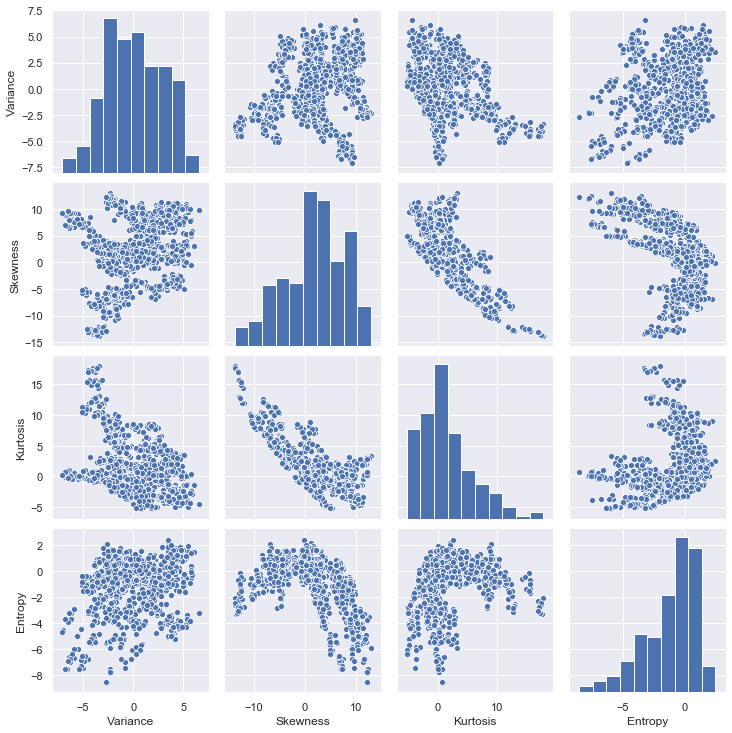

In [8]:
sb.pairplot(data = numData)

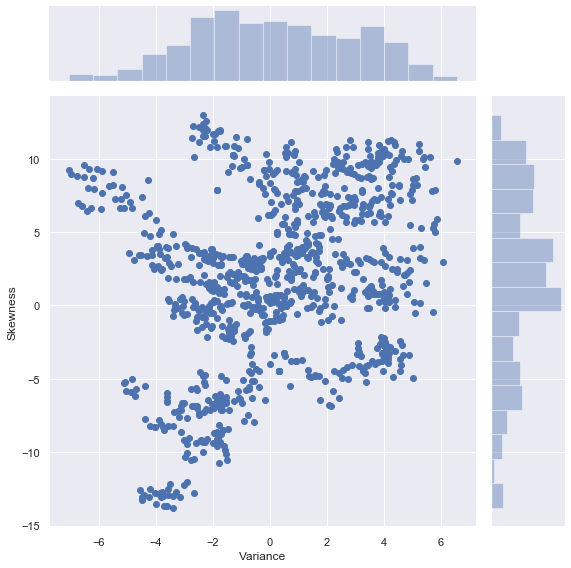

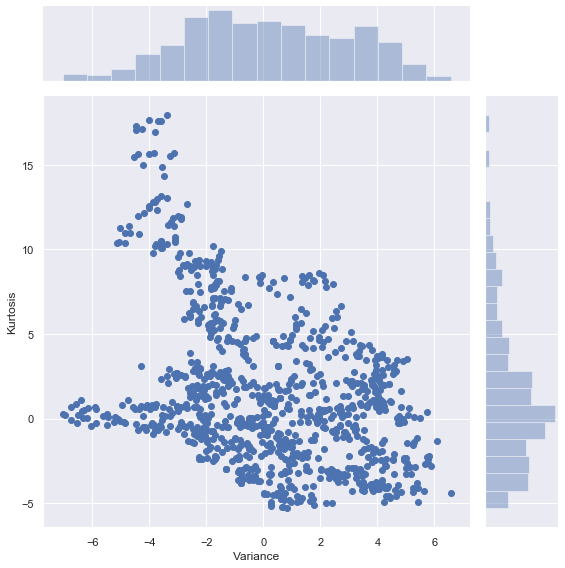

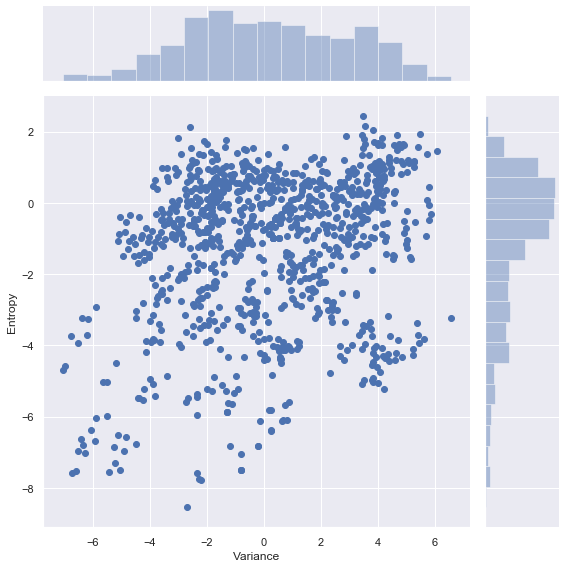

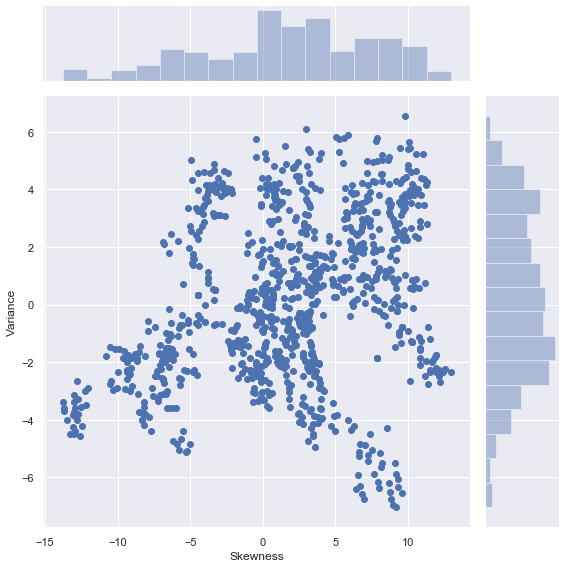

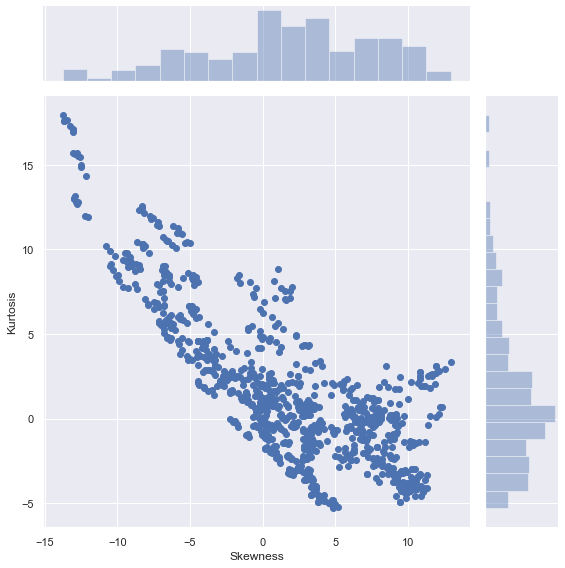

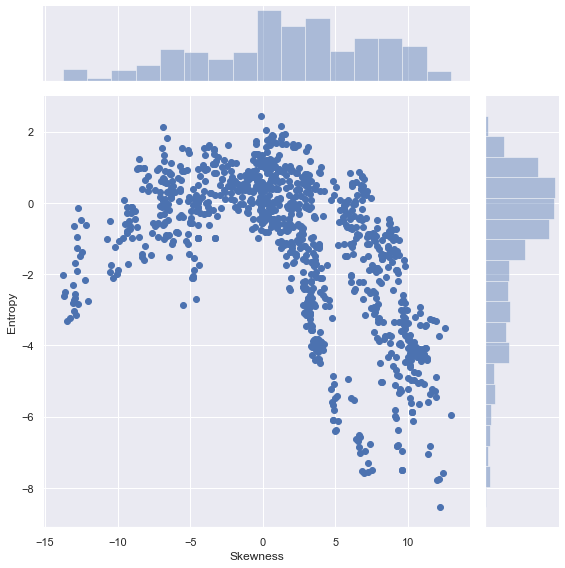

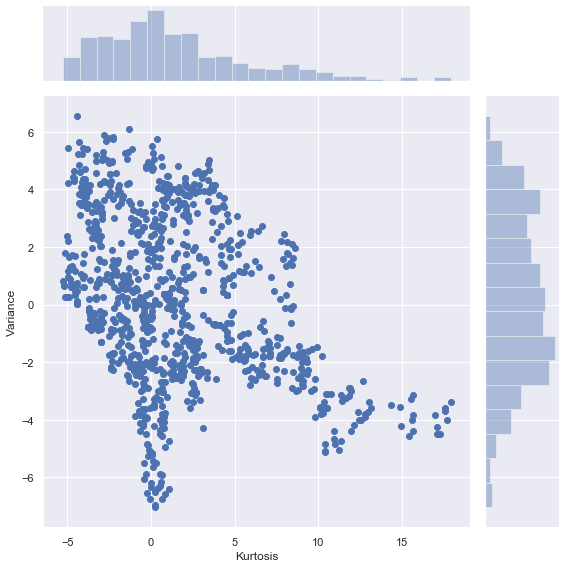

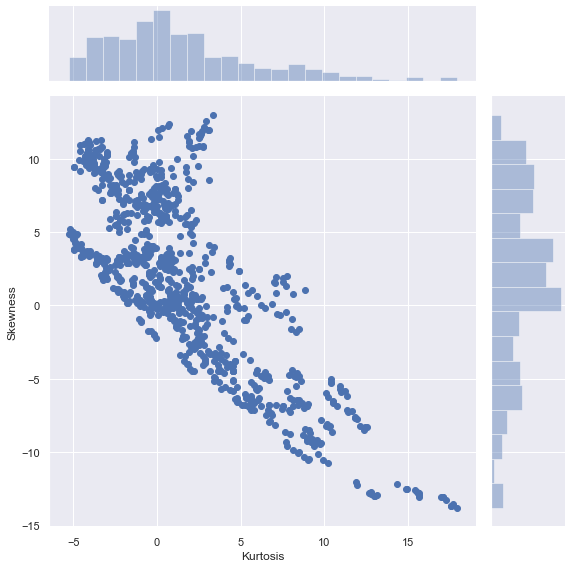

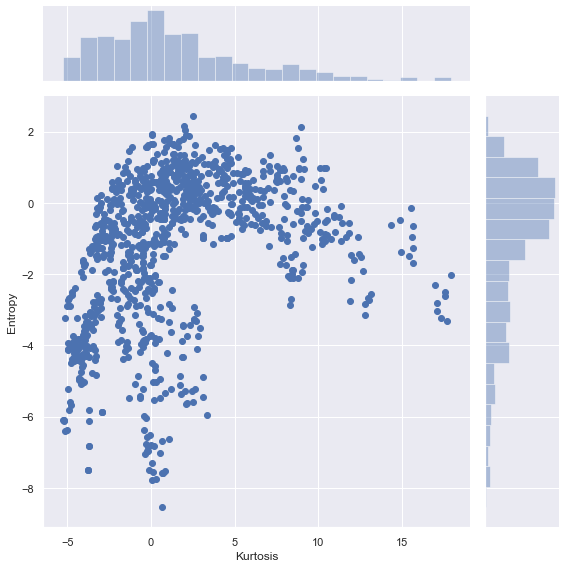

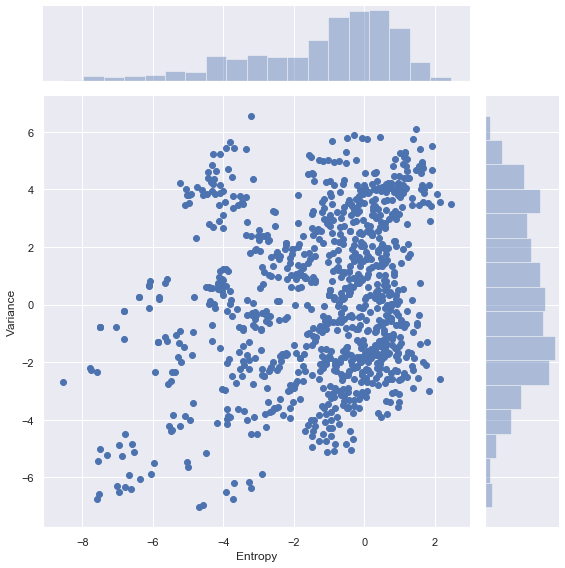

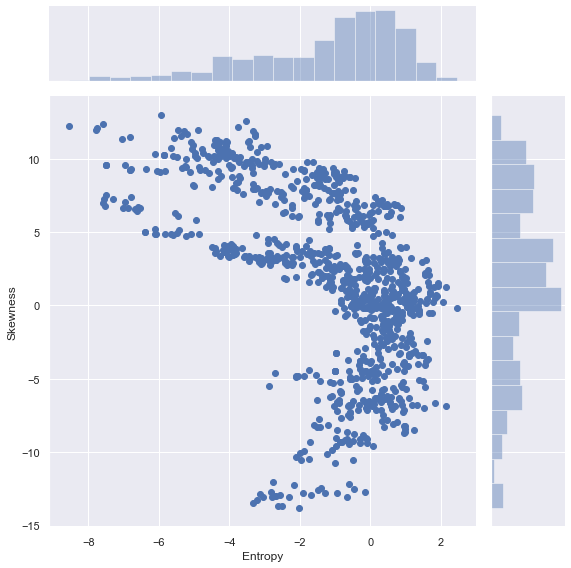

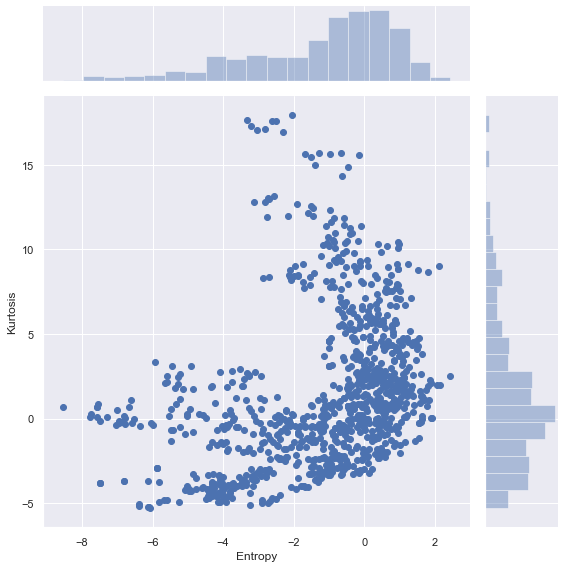

In [9]:
for var1 in numData:
    for var2 in numData:
        if (var1 != var2):
            sb.jointplot(x = numData[var1], y = numData[var2], height = 8)

In [10]:
Kurtosis = pd.DataFrame(quizData[['Kurtosis']])

Q1 = Kurtosis.quantile(0.25)
Q3 = Kurtosis.quantile(0.75)
IQR = Q3 - Q1

((Kurtosis < (Q1 - 1.5 * IQR)) | (Kurtosis > (Q3 + 1.5 * IQR))).sum()

Kurtosis    37
dtype: int64

## b) Comment : Which numeric variable has the most number of outliers? Exactly how many outliers does this variable have, if we consider the points outside the range [Q1 – 1.5 * (Q3 – Q1), Q3 + 1.5 * (Q3 – Q1)] to be the outliers? 
### Kurtosis has the most number of outliers according to box plot.
### This variable has 37 outliers, according to the calculation above.

## c) Print the statistical description and plot standard statistical distributions for the response variable – Banknote. 

In [11]:
catData = pd.DataFrame(quizData[['Banknote']])
catData.head()

,Banknote
0,Genuine
1,Genuine
2,Genuine
3,Genuine
4,Genuine


In [12]:
print("Data type: ", type(catData))
print("Data dims: ", catData.shape)

print("Columns: ", len(catData.columns))

print("Data Types: ")
catData.dtypes

catData.info()
catData.describe()

Data type:  <class 'pandas.core.frame.DataFrame'>
Data dims:  (1000, 1)
Columns:  1
Data Types: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
Banknote    1000 non-null object
dtypes: object(1)
memory usage: 7.9+ KB


,Banknote
count,1000
unique,2
top,Forged
freq,500


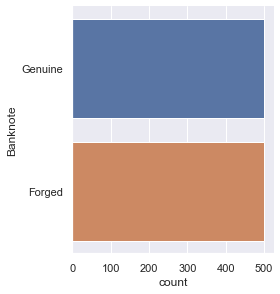

In [13]:
sb.catplot(y = 'Banknote', data = catData, kind = 'count', height = 4)

## d) Write a small piece of code to print the exact ratio (“Genuine” : “Forged”) in the response variable Banknote. 

In [14]:
Genuine = quizData[quizData["Banknote"] == 'Genuine']
Forged = quizData[quizData["Banknote"] == 'Forged']
print("Genuine : Forged")
print("=", Genuine["Banknote"].count(), ":", Forged["Banknote"].count())

Genuine : Forged
= 500 : 500


## e) Visualize the relationship of response variable Banknote with the numeric predictor variables using swarmplots. 

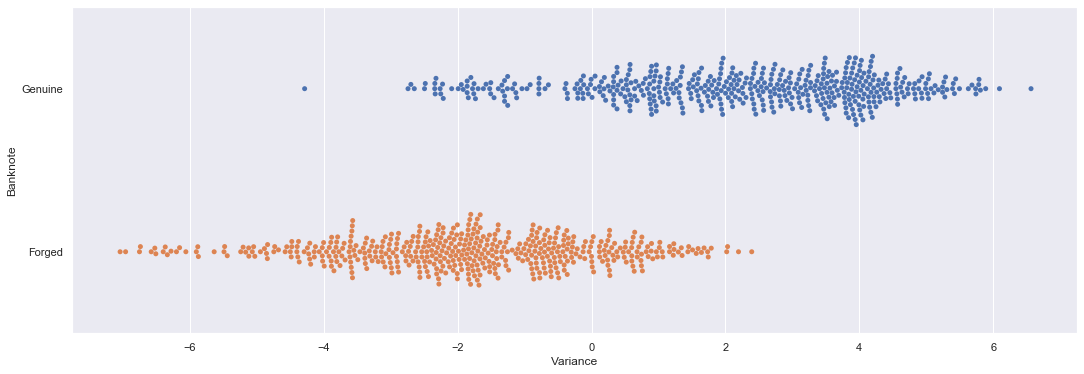

In [15]:
jointDF = pd.concat([numData, catData.reindex(index=numData.index)], sort = False, axis = 1)

f, axes = plt.subplots(1, 1, figsize=(18, 6))
sb.swarmplot(x = "Variance", y = "Banknote", data = jointDF, orient = "h")

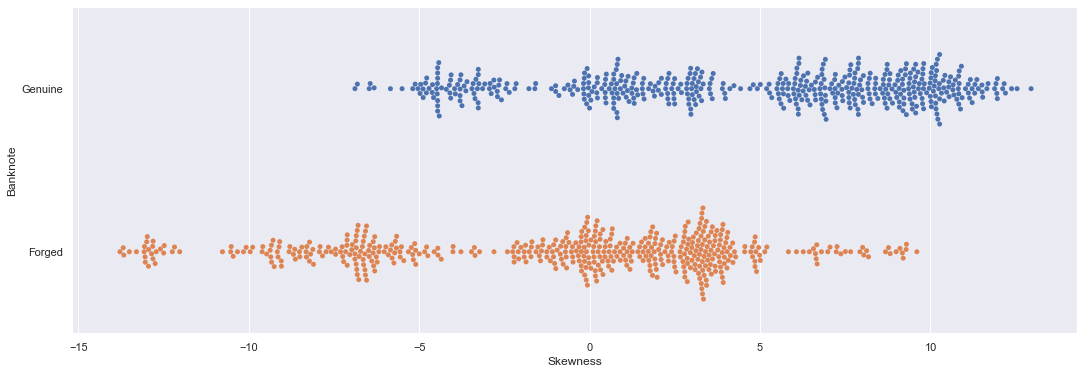

In [16]:
jointDF = pd.concat([numData, catData.reindex(index=numData.index)], sort = False, axis = 1)

f, axes = plt.subplots(1, 1, figsize=(18, 6))
sb.swarmplot(x = "Skewness", y = "Banknote", data = jointDF, orient = "h")

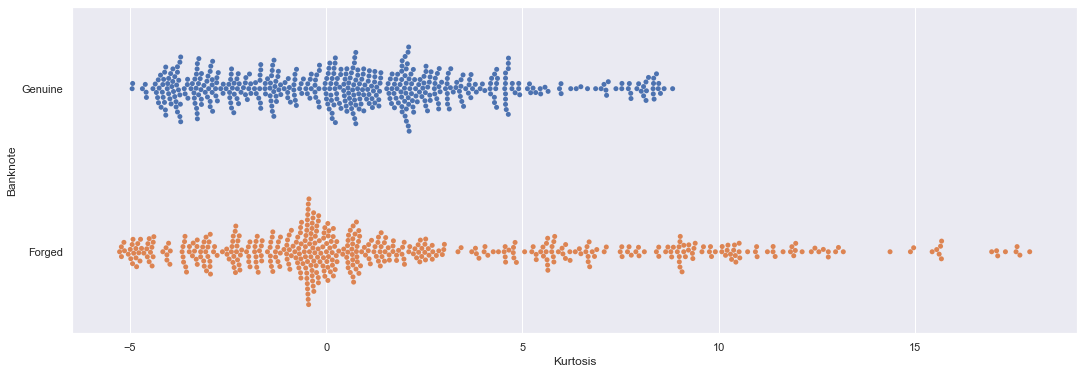

In [17]:
jointDF = pd.concat([numData, catData.reindex(index=numData.index)], sort = False, axis = 1)

f, axes = plt.subplots(1, 1, figsize=(18, 6))
sb.swarmplot(x = "Kurtosis", y = "Banknote", data = jointDF, orient = "h")

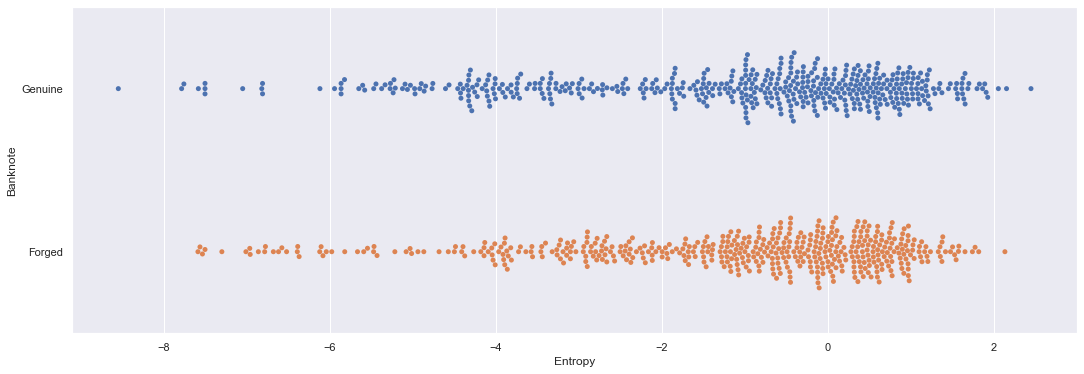

In [18]:
jointDF = pd.concat([numData, catData.reindex(index=numData.index)], sort = False, axis = 1)

f, axes = plt.subplots(1, 1, figsize=(18, 6))
sb.swarmplot(x = "Entropy", y = "Banknote", data = jointDF, orient = "h")

# Problem 2: Uni-Variate Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

## a) Partition the data randomly into Train and Test sets; 80% for Train and 20% for Test. On the Train set, fit four uni-variate Decision Tree models for Banknote against each of the four numeric predictor variables – Variance, Skewness, Kurtosis, Entropy. In each case, do not fit a decision tree more than depth 4 (may overfit otherwise). 
## b) Predict Banknote using each of the four models on both Train and Test data. Show the Confusion Matrix for each model, both for Train and Test datasets. Print the Classification Accuracy for the tree models, on both datasets.  

In [20]:
# Response
Banknote = pd.DataFrame(quizData['Banknote'])

# Predictors
Variance = pd.DataFrame(quizData['Variance'])
Skewness = pd.DataFrame(quizData['Skewness'])
Kurtosis = pd.DataFrame(quizData['Kurtosis'])
Entropy = pd.DataFrame(quizData['Entropy'])

Train Set : (800, 1) (800, 1)
Test Set  : (200, 1) (200, 1)
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.84

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.87



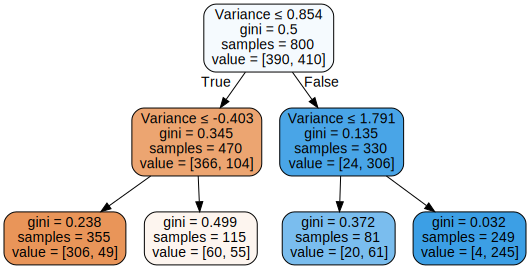

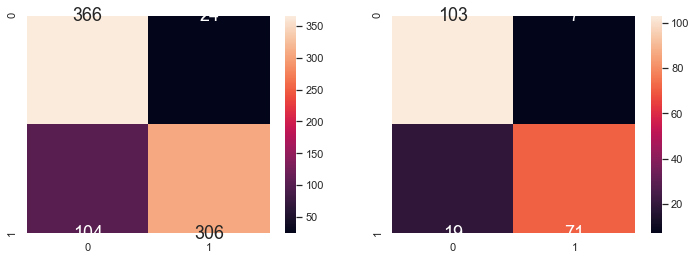

In [21]:
# Response, y: Banknote
# Predictor, X: Variance

Variance_train, Variance_test, Banknote_train, Banknote_test = train_test_split(Variance, Banknote, test_size = 0.20)

print("Train Set :", Banknote_train.shape, Variance_train.shape)
print("Test Set  :", Banknote_test.shape, Variance_test.shape)

dectree = DecisionTreeClassifier(max_depth = 2)  
dectree.fit(Variance_train, Banknote_train)   

Banknote_train_pred = dectree.predict(Variance_train)
Banknote_test_pred = dectree.predict(Variance_test)

print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(Variance_train, Banknote_train))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(Variance_test, Banknote_test))
print()

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(Banknote_train, Banknote_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(Banknote_test, Banknote_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

treedot = export_graphviz(dectree,                                    
                          feature_names = Variance_train.columns,             
                          out_file = None,                              
                          filled = True,                                
                          rounded = True,                              
                          special_characters = True)                    

graphviz.Source(treedot)

Train Set : (800, 1) (800, 1)
Test Set  : (200, 1) (200, 1)
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.735

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.745



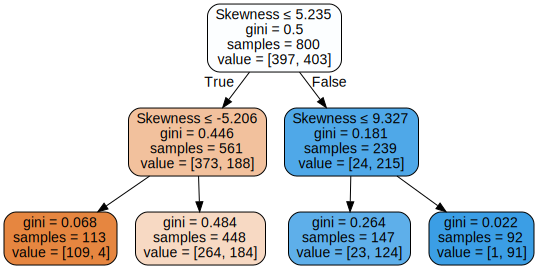

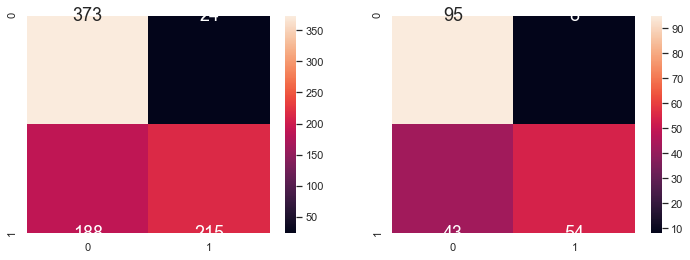

In [22]:
# Response, y: Banknote
# Predictor, X: Skewness

Skewness_train, Skewness_test, Banknote_train, Banknote_test = train_test_split(Skewness, Banknote, test_size = 0.20)

print("Train Set :", Banknote_train.shape, Skewness_train.shape)
print("Test Set  :", Banknote_test.shape, Skewness_test.shape)

dectree = DecisionTreeClassifier(max_depth = 2)  
dectree.fit(Skewness_train, Banknote_train)   

Banknote_train_pred = dectree.predict(Skewness_train)
Banknote_test_pred = dectree.predict(Skewness_test)

print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(Skewness_train, Banknote_train))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(Skewness_test, Banknote_test))
print()

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(Banknote_train, Banknote_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(Banknote_test, Banknote_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

treedot = export_graphviz(dectree,                                    
                          feature_names = Skewness_train.columns,             
                          out_file = None,                              
                          filled = True,                                
                          rounded = True,                              
                          special_characters = True)                    

graphviz.Source(treedot)

Train Set : (800, 1) (800, 1)
Test Set  : (200, 1) (200, 1)
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.625

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.52



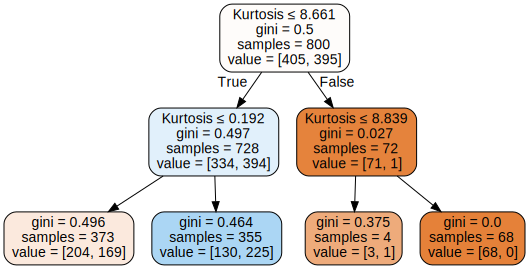

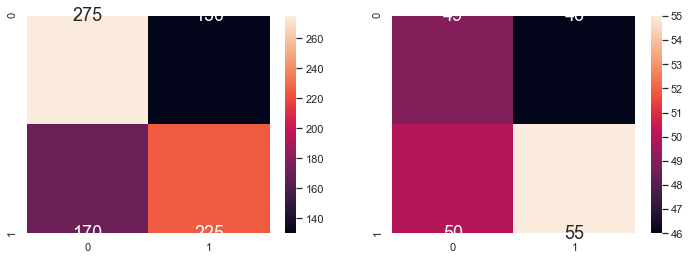

In [23]:
# Response, y: Banknote
# Predictor, X: Kurtosis

Kurtosis_train, Kurtosis_test, Banknote_train, Banknote_test = train_test_split(Kurtosis, Banknote, test_size = 0.20)

print("Train Set :", Banknote_train.shape, Kurtosis_train.shape)
print("Test Set  :", Banknote_test.shape, Kurtosis_test.shape)

dectree = DecisionTreeClassifier(max_depth = 2)  
dectree.fit(Kurtosis_train, Banknote_train)   

Banknote_train_pred = dectree.predict(Kurtosis_train)
Banknote_test_pred = dectree.predict(Kurtosis_test)

print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(Kurtosis_train, Banknote_train))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(Kurtosis_test, Banknote_test))
print()

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(Banknote_train, Banknote_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(Banknote_test, Banknote_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

treedot = export_graphviz(dectree,                                    
                          feature_names = Kurtosis_train.columns,             
                          out_file = None,                              
                          filled = True,                                
                          rounded = True,                              
                          special_characters = True)                    

graphviz.Source(treedot)

Train Set : (800, 1) (800, 1)
Test Set  : (200, 1) (200, 1)
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.5625

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.505



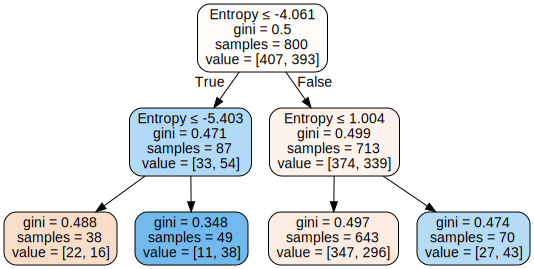

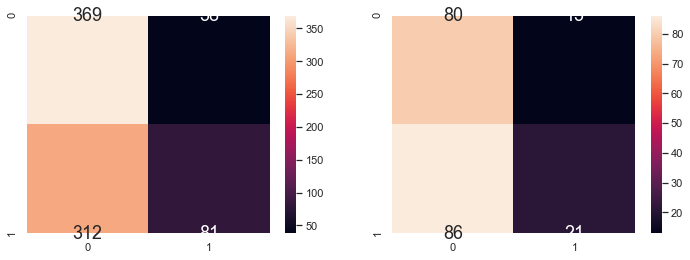

In [24]:
# Response, y: Banknote
# Predictor, X: Entropy

Entropy_train, Entropy_test, Banknote_train, Banknote_test = train_test_split(Entropy, Banknote, test_size = 0.20)

print("Train Set :", Banknote_train.shape, Entropy_train.shape)
print("Test Set  :", Banknote_test.shape, Entropy_test.shape)

dectree = DecisionTreeClassifier(max_depth = 2)  
dectree.fit(Entropy_train, Banknote_train)   

Banknote_train_pred = dectree.predict(Entropy_train)
Banknote_test_pred = dectree.predict(Entropy_test)

print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(Entropy_train, Banknote_train))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(Entropy_test, Banknote_test))
print()

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(Banknote_train, Banknote_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(Banknote_test, Banknote_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

treedot = export_graphviz(dectree,                                    
                          feature_names = Entropy_train.columns,             
                          out_file = None,                              
                          filled = True,                                
                          rounded = True,                              
                          special_characters = True)                    

graphviz.Source(treedot)

## c) Comment : Which of the four uni-variate Decision Trees is the best in terms of predicting Banknote? Justify. 
### The Variance decision tree is the best in terms of predicting Banknote. This is because it has the highest classification accuracy for both train and test dataset, amongst all data.

# Problem 3: Multi-Variate Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

## a) Partition the data randomly into Train and Test sets; 80% for Train and 20% for Test (you may use the same partition as before, if you want). On the Train set, fit a single multi-variate Decision Tree model (max depth 4) for Banknote against all of the four other numeric predictor variables – Variance, Skewness, Kurtosis, Entropy. 
## b) Predict Banknote using the tree model you fit on both Train and Test data. Show the Confusion Matrix on both Train and Test datasets. Print the Classification Accuracy for the tree model on both Train and Test datasets. 
 

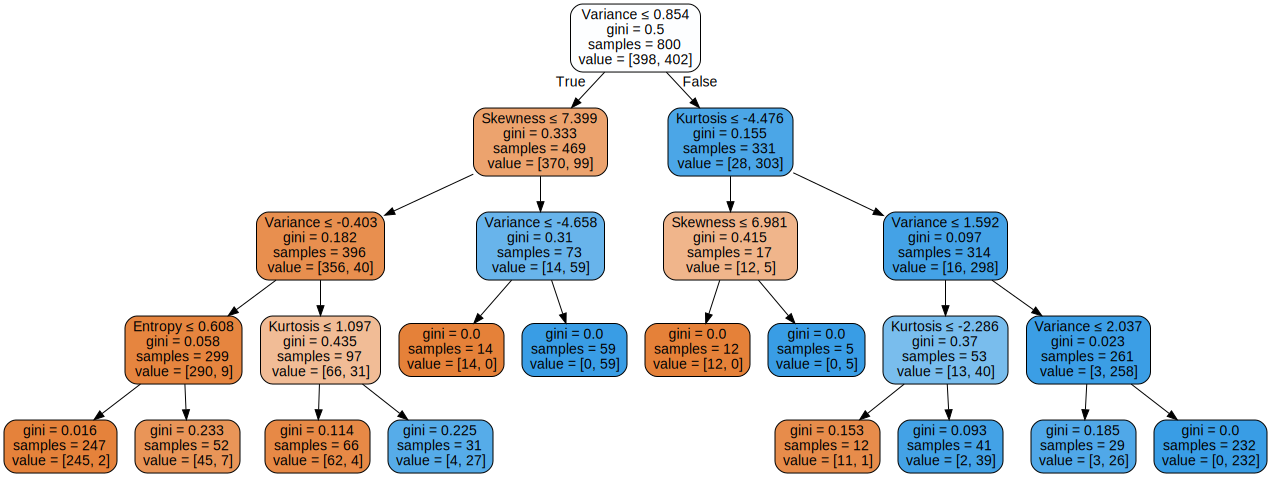

In [26]:
y = pd.DataFrame(catData[['Banknote']])
X = pd.DataFrame(numData)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

dectree = DecisionTreeClassifier(max_depth = 4)  
dectree.fit(X_train, y_train)                    

y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

treedot = export_graphviz(dectree,                              
                          feature_names = X_train.columns,              
                          out_file = None,                      
                          filled = True,                                
                          rounded = True,                           
                          special_characters = True)                

graphviz.Source(treedot)

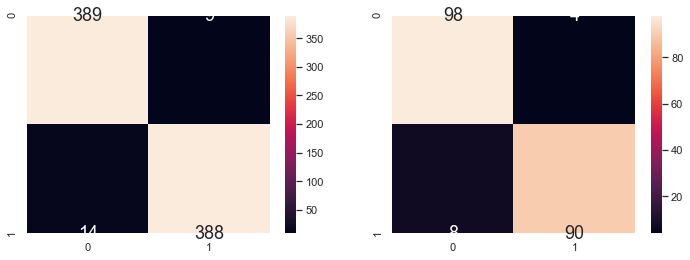

In [27]:
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [28]:
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.97125

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.94



## c) Write a small piece of code to print the exact FPR and FNR values calculated from each of the confusion matrices. You may consider “Genuine” as Positive and “Forged” as Negative in this context and calculate accordingly. 

In [29]:
confusionMatrix_train = confusion_matrix(y_train, y_train_pred)
TN = confusionMatrix_train[0,0]
FP = confusionMatrix_train[0,1]
FN = confusionMatrix_train[1,0]
TP = confusionMatrix_train[1,1]

In [30]:
FPR = FP / (FP + TN)
FNR = FN / (FN + TP)

print("Train:")
print("FPR = ", FPR)
print("FNR = ", FNR)

Train:
FPR =  0.022613065326633167
FNR =  0.03482587064676617


In [31]:
confusionMatrix_test = confusion_matrix(y_test, y_test_pred)
TN = confusionMatrix_test[0,0]
FP = confusionMatrix_test[0,1]
FN = confusionMatrix_test[1,0]
TP = confusionMatrix_test[1,1]

In [32]:
FPR = FP / (FP + TN)
FNR = FN / (FN + TP)

print("Test:")
print("FPR = ", FPR)
print("FNR = ", FNR)

Test:
FPR =  0.0392156862745098
FNR =  0.08163265306122448


## d) Print ONLY the False Positive cases (complete rows from the dataframe) in each of the Train and Test datasets. Print ONLY the False Negative cases (complete rows from the dataframe) in each of the Train and Test datasets. 

In [33]:
FPc_df=pd.DataFrame(columns=X_train.columns)
FNc_df=pd.DataFrame(columns=X_train.columns)

for i in range(len(y_train)):
    if (y_train.iloc[i].values != y_train_pred[i]):
        if (y_train_pred[i] == "Forged"):
            FNc_df = FNc_df.append(X_train.iloc[i])
        else:
            FPc_df=FPc_df.append(X_train.iloc[i])
            
print("False Positive Cases (train): \n")
print(FPc_df)
print("False Negative Cases (train): \n")
print(FNc_df)

# tp = genuine
# fp = forged predicted as genuine

# tn = forged
# fn = genuine predicted as forged

False Positive Cases (train): 

     Variance  Skewness  Kurtosis   Entropy
709  0.003120  -4.00610    1.7956  0.917220
655  1.563100   0.89599   -1.9702  0.654720
623  0.030219  -1.05120    1.4024  0.773690
770  0.163580  -3.35840    1.3749  1.356900
663  1.742500   3.68330   -4.0129 -1.720700
649  2.031000   1.85200   -3.0121  0.003003
648  0.552980  -3.46190    1.7048  1.100800
838  1.437800   0.66837   -2.0267  1.027100
832  2.017700   1.79820   -2.9581  0.209900
False Negative Cases (train): 

     Variance  Skewness  Kurtosis   Entropy
34  -1.616200  0.809080    8.1628  0.608170
374 -1.505500  0.070346    6.8681 -0.506480
169  0.117390  6.276100   -1.5495 -2.474600
322 -1.734400  2.017500    7.7618  0.935320
86  -1.131300  1.903700    7.5339  1.022000
123 -1.507500  1.922400    7.1466  0.891360
478 -1.778100  0.854600    7.1303  0.027572
172 -1.695200  1.065700    8.8294  0.949550
476  0.379800  0.709800    0.7572 -0.444400
278  0.895660  7.776300   -2.7473 -1.935300
241 -1.39310

In [34]:
FNc_df=pd.DataFrame(columns=X_test.columns)
FPc_df=pd.DataFrame(columns=X_test.columns)

for i in range(len(y_test)):
    if (y_test.iloc[i].values != y_test_pred[i]):
        if (y_test_pred[i] == "Forged"):
            FNc_df = FNc_df.append(X_test.iloc[i])
        else:
            FPc_df=FPc_df.append(X_test.iloc[i])

print("False Positive Cases (test): \n")
print(FPc_df)
print("False Negative Cases (test): \n")
print(FNc_df)

False Positive Cases (test): 

     Variance  Skewness  Kurtosis  Entropy
892  -0.36025   -4.4490    2.1067  0.94308
745  -0.17296   -1.1816    1.3818  0.73360
831   0.74428   -3.7723    1.6131  1.57540
816  -0.37013   -5.5540    4.7749  1.54700
False Negative Cases (test): 

     Variance  Skewness  Kurtosis  Entropy
248   0.37980    0.7098    0.7572 -0.44440
95   -0.64472   -4.6062    8.3470 -2.70990
436   0.37980    0.7098    0.7572 -0.44440
471   0.39559    6.8866    1.0588 -0.67587
409   0.64295    7.1018    0.3493 -0.41337
418  -1.25760    1.5892    7.0078  0.42455
90    1.48060    7.6377   -2.7876 -1.03410
230  -1.33890    1.5520    7.0806  1.03100


## e) Predict the category of bank note (Genuine/Forged) for the following data points using the tree model you fit.

In [35]:
dataPoints = [{'Variance': -4.9447, 'Skewness': 3.3005, 'Kurtosis': 1.063, 'Entropy': -1.444}, 
              {'Variance': 0.94225, 'Skewness': 5.8561, 'Kurtosis': 1.8762, 'Entropy': -0.32544},
              {'Variance': 2.2429, 'Skewness': -4.1427, 'Kurtosis': 5.2333, 'Entropy': -0.40173}, 
              {'Variance': 0.53936, 'Skewness': 3.8944, 'Kurtosis': -4.8166, 'Entropy': -4.3418}, 
              {'Variance': -2.5724, 'Skewness': -0.95602, 'Kurtosis': 2.7073, 'Entropy': -0.16639} ]

In [36]:
dataPoints1 = pd.DataFrame(dataPoints)
prediction = dectree.predict(dataPoints1)
print(prediction)

['Forged' 'Genuine' 'Genuine' 'Forged' 'Forged']


### Based on the tree model I fitted, the bank notes are forged, genuine, genuine, forged and forged respectively.